### H13 (Snow Water Equivalent) product can be analyzed and compared to ERA5 snow density reanalysis data using this module (monthly)

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import ipywidgets as widgets
import pandas as pd
import datetime
from datetime import timedelta
from PIL import Image
from osgeo import gdal
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interact
from IPython.display import display, clear_output

2021-01-26 22:02:57,377 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)



### Product display
An example of H13 and ERA5 can be seen below:



Text(0.5, 1.0, 'Example of ERA5 reanalysis snow density data')

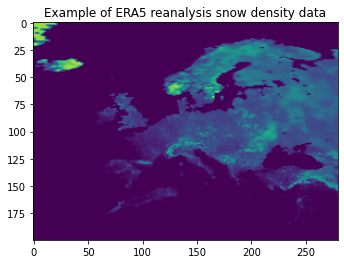

In [3]:
ds = gdal.Open('./era5_test_data/era5_2013-01_cut.tif')
era5 = ds.ReadAsArray()
im = plt.imshow(era5)

plt.title('Example of ERA5 reanalysis snow density data')

Text(0.5, 1.0, 'Example of H13  snow density data')

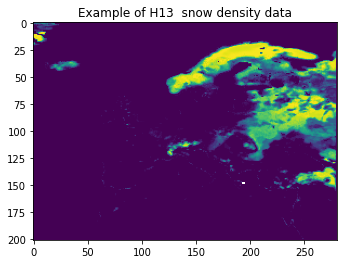

In [4]:
ds2 = gdal.Open('./rho_test_data/rho_2013-01.tif')
rho = ds2.ReadAsArray()
rho = rho*1000
im2 = plt.imshow(rho)
plt.title('Example of H13  snow density data')

In [5]:
import glob
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive
import os

import pandas as pd

start_day = datetime.datetime.strptime("20130101", "%Y%m%d")
end_day = datetime.datetime.strptime("20191231", "%Y%m%d")
date_list = [start_day + timedelta(n) for n in range(int((end_day - start_day).days) + 1)]
#date_list contains all the dates from the start of 2013 to the end of 2019 daily.
df = pd.DataFrame({'date':date_list})
df_temp = df.set_index('date')
yearList = sorted(df_temp.index.year.unique().tolist())
yearList=[str(x) for x in yearList]

df['month_year'] = df['date'].dt.to_period('M')
dateList = df['month_year'].astype(str).values.tolist()

dateList = sorted(list(set(dateList)))
#The code above translates the daily dates to monthly dates. E.g. '2015-04' (as string)


2021-01-26 22:03:09,575 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



### Product display - monthly, between the years of 2013 and 2019

ERA5 data can be downloaded in netCDF format. Montly H13 data was also in netCDF format. Both were transformed into individual raster files with respect to the dates (months).

A display of all the ERA5 and H13 snow density files between the years of 2013 and 2019 can be observed below.

In [6]:
process_path = '/home/knn/Desktop/HSAF_Snow_Analysis/SWE/H13_and_ERA5_Comparison_Analysis/era5_test_data'

    
w = widgets.Dropdown(options=dateList, value=dateList[0], description='era5',disabled=False,layout={'width': 'max-content'})
clear_output()


def era5(date): 
    file = 'era5_'+date+'_cut.tif'   
    p = os.path.join(process_path, file)
    op_ = gdal.Open(p)
    array_=op_.ReadAsArray()
    plt.imshow(array_)
            
  
widgets.interactive(era5, date = w)

interactive(children=(Dropdown(description='era5', layout=Layout(width='max-content'), options=('2013-01', '20…

In [7]:
process_path2 = '/home/knn/Desktop/HSAF_Snow_Analysis/SWE/H13_and_ERA5_Comparison_Analysis/rho_test_data'

w = widgets.Dropdown(options=dateList, value=dateList[0], description='rho',disabled=False,layout={'width': 'max-content'})
clear_output()



def rho(date): 
    file = 'rho_'+ date +'.tif'   
    p = os.path.join(process_path2, file)
    op_ = gdal.Open(p)
    array_=op_.ReadAsArray()
    array_=array_*1000
    plt.imshow(array_)
            
  
widgets.interactive(rho, date = w)


interactive(children=(Dropdown(description='rho', layout=Layout(width='max-content'), options=('2013-01', '201…

In [8]:
start = datetime.datetime.strptime("20130101", "%Y%m%d")
end = datetime.datetime.strptime("20191231", "%Y%m%d")
date_list2 = [start_day + timedelta(n) for n in range(int((end - start).days) + 1)]
df3 = pd.DataFrame({'date':date_list2})


df3['month_year'] = df3['date'].dt.to_period('M')
df3['year']= df3['date'].dt.year
df3['months']= df3['date'].dt.month


In [9]:
dateList3 = df3['month_year'].astype(str).values.tolist()
dateList3 = sorted(list(set(dateList3)))
yearList = df3['year'].astype(str).values.tolist()
monthList1 = df3['months'].astype(str).values.tolist()
uniquemonthList=sorted(map(int,(list(set(monthList1)))))
uniqueyearList= sorted(list(set(yearList)))

yearList =  [ele for ele in uniqueyearList for i in range(12)] 

monthList = sorted(list(map(int,uniquemonthList)))* 7


### Correlation between H13 and ERA5

The correlation between ERA5 and H13 were calculated for the entirety of 2013-2019 below & shown as a map. The correlation can be observed for each location individually

2021-01-26 22:03:28,088 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())

2021-01-26 22:03:32,107 [3409] WARNING  matplotlib.font_manager:1357: [JupyterRequire] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


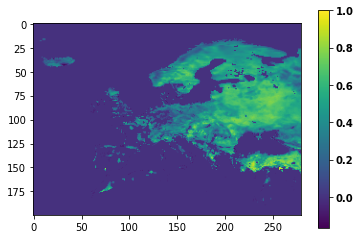

In [10]:
# %matplotlib notebook
import pandas
from scipy.stats import pearsonr
from osgeo import gdal
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np
import matplotlib

start_day = datetime.datetime.strptime("20130101", "%Y%m%d")
end_day = datetime.datetime.strptime("20191231", "%Y%m%d")
date_list = [start_day + timedelta(n) for n in range(int((end_day - start_day).days) + 1)]
df = pd.DataFrame({'date': date_list})
df_temp = df.set_index('date')
yearList = sorted(df_temp.index.year.unique().tolist())
yearList = [str(x) for x in yearList]
df['month_year'] = df['date'].dt.to_period('M')
dateList = df['month_year'].astype(str).values.tolist()
dateList = sorted(list(set(dateList)))


e_ = 'era5_2013-10_cut.tif'
e_ = os.path.join(process_path, e_)
opera_ = gdal.Open(e_)
data1_ = opera_.ReadAsArray()
eral = []
rhol = []
for date in dateList:
    e = 'era5_' + date + '_cut.tif'
    r = 'rho_' + date + '.tif'
    e = os.path.join(process_path, e)
    r = os.path.join(process_path2, r)
    opera = gdal.Open(e)
    data1 = opera.ReadAsArray()
    orho = gdal.Open(r)
    data2 = orho.ReadAsArray()
    data2 = 1000 * data2
    data2 = data2[0:200, 0:280]
    # data1 = data1[0:30,0:30]
    eral.append(data1)
    rhol.append(data2)

eral = np.array(eral) #84,200,280

rhol = np.array(rhol)

eral = np.nan_to_num(eral)
rhol = np.nan_to_num(rhol)

corrimg = np.zeros(data1_.shape)

for i in range(0,200):
    for j in range(0,280):
        cor,_ = pearsonr(eral[:,i,j],rhol[:,i,j])
        if np.isfinite(cor).all():
            corrimg[i,j] = cor
        else:
            cor = np.nan_to_num(cor)
            corrimg[i,j] = cor
            
a = plt.imshow(corrimg)

font_ = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font_)
plt.colorbar(a)
plt.show()



The correlation between ERA5 and H13 were calculated month-by-month for the years between 2013 and 2019 in the below cell:

In [11]:
start = datetime.datetime.strptime("20130101", "%Y%m%d")
end = datetime.datetime.strptime("20191231", "%Y%m%d")
date_list2 = [start + timedelta(n) for n in range(int((end - start).days) + 1)]
df3 = pd.DataFrame({'date':date_list2})


df3['month_year'] = df3['date'].dt.to_period('M')
df3['year']= df3['date'].dt.year
df3['months']= df3['date'].dt.month

dateList3 = df3['month_year'].astype(str).values.tolist()
dateList3 = sorted(list(set(dateList3)))
yearList = df3['year'].astype(str).values.tolist()
monthList1 = df3['months'].astype(str).values.tolist()
uniquemonthList=sorted(map(int,(list(set(monthList1)))))
uniqueyearList= sorted(list(set(yearList)))

yearList = [ele for ele in uniqueyearList for i in range(12)]

monthList = sorted(list(map(int,uniquemonthList)))* 7

# jan_used = [i for i in dateList3 if '-01' in i]
months_ = ['-01','-02','-03','-04','-05','-06','-07','-08','-09','-10','-11','-12']
dict_months = {}


e_ = 'era5_2013-10_cut.tif'
e_ = os.path.join(process_path , e_)
opera_ = gdal.Open(e_)
data1_ = opera_.ReadAsArray()

def dictm(m):
    f = []
    for date in dateList3:
        if m in date:
            f.append(date)

    dict_months[m] = f

for i in months_:
    dictm(i)
    
w = widgets.Dropdown(options=months_, value=months_[0], description='correlation maps',disabled=False,layout={'width': 'max-content'})
clear_output()

def corr_mon(key):
    eral = []
    rhol = []

    for date in dict_months[key]:
        e = 'era5_' + date + '_cut.tif'
        r = 'rho_' + date + '.tif'
        e = os.path.join(process_path , e)
        r = os.path.join(process_path2 , r)
        opera = gdal.Open(e)
        data1 = opera.ReadAsArray()
        orho= gdal.Open(r)
        data2 = orho.ReadAsArray()
        data2 = 1000*data2
        data2 = data2[0:200,0:280]

        eral.append(data1)
        rhol.append(data2)
    eral = np.array(eral)
    rhol = np.array(rhol)
    eral = np.nan_to_num(eral)
    rhol = np.nan_to_num(rhol)

    corrimg = np.zeros(data1_.shape)
    for i in range(0,200):
        for j in range(0,280):
            cor,_ = pearsonr(eral[:,i,j],rhol[:,i,j])
            if np.isfinite(cor).all():
                corrimg[i, j] = cor
            else:
                cor = np.nan_to_num(cor)
                corrimg[i, j] = cor
    a = plt.imshow(corrimg)
    plt.colorbar(a)
    plt.show()

widgets.interactive(corr_mon, key = w)


interactive(children=(Dropdown(description='correlation maps', layout=Layout(width='max-content'), options=('-…

### The Snow Density Values of Any Coordinate Chosen 

The below cell wants a coordinate - latitude and longitude. The cells below that will show a bar graph that compares the snow density values (monthly and total average)of H13 and ERA5 of that specific coordinate.

In [12]:
from ipywidgets import interact, widgets
from IPython.display import display

text1 = widgets.Text(
    value='latitude',
    
    description='Latitude:',
    disabled=False
)
display(text1)

text2 = widgets.Text(
    value='longitude',
    
    description='Longitude:',
    disabled=False
)
display(text2)


def callback(wdgt):
    # replace by something useful
    display(wdgt.value)
    


text1.on_submit(callback)
text2.on_submit(callback)


Text(value='latitude', description='Latitude:')

Text(value='longitude', description='Longitude:')

'25'

'200'

In [13]:
lat1 = int(text1.value)
lon1 = int(text2.value)

In [14]:
def coord(lat,lon):
    y_era= []
    y_rho= []
    for date in dateList:
        e = 'era5_' + date + '_cut.tif'
        r = 'rho_' + date + '.tif'
        e = os.path.join(process_path,e)
        opera = gdal.Open(e)
        arrayera= opera.ReadAsArray()
        erapnt = arrayera[lat,lon]
        y_era.append(erapnt)
        
        r = os.path.join(process_path2,r)
        orho = gdal.Open(r)
        arrayrho= orho.ReadAsArray()
        arrayrho= arrayrho*1000
        rhopnt = arrayrho[lat,lon]
        y_rho.append(rhopnt)
    return pd.DataFrame({'rho': y_rho, 'era5': y_era, 'months': monthList, 'year':yearList,'date':dateList})

lat1 = int(lat1)  
lon1 = int(lon1)

df_res =coord(lat1,lon1)

#This cell creates a pandas dataframe with all the snow density values of ERA5 and H13

In [15]:
avgrho = []
avgera = []

for i in uniquemonthList:
    
    rslt_df2 = df_res.loc[df_res['months'] == i]
    rho_avg = rslt_df2['rho'].mean()
    era_avg= rslt_df2['era5'].mean()
    avgrho.append(rho_avg)
    avgera.append(era_avg)
df_avg = pd.DataFrame({'Rho_avg': avgrho, 'Era5_avg': avgera, 'months': uniquemonthList})
#This cell creates a pandas dataframe with all the average snow density values- monthly- of ERA5 and H13

In [16]:
w = widgets.Dropdown(options=uniqueyearList + ['Average_of_Rho_and_Era5'], value=uniqueyearList[0], description='years',disabled=False,layout={'width': 'max-content'})
clear_output()

def bar_graphs(year): 
    if year == 'Average_of_Rho_and_Era5':
        
        x= df_avg['months']
        _X = np.arange(len(x))
        era_y = df_avg['Rho_avg']
        rho_y = df_avg['Era5_avg']
        plt.figure(figsize=(50,20))

        plt.bar(_X - 0.2, era_y, 0.4)
        plt.bar(_X + 0.2, rho_y, 0.4)
        plt.xticks(_X, x)
        plt.xlabel('Months', fontsize=40)
        plt.ylabel('Snow Density (kg/m^3)', fontsize=40)
        colors = {'era5':'blue', 'rho':'orange'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        plt.legend(handles, labels)
        plt.show()
    else:
        rslt_df = df_res.loc[df_res['year'] == year]
        x= rslt_df['date']
        _X = np.arange(len(x))
        era_y = rslt_df['era5']
        rho_y = rslt_df['rho']
        
        colors = {'era5':'blue', 'rho':'orange'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        

        
        plt.figure(figsize=(50,20))

        font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

        matplotlib.rc('font', **font)

        plt.xlabel('Months', fontsize=40)
        plt.ylabel('Snow Density (kg/m^3)', fontsize=40)
        plt.legend(handles, labels)
        plt.bar(_X - 0.2, era_y, 0.4)
        plt.bar(_X + 0.2, rho_y, 0.4)
        plt.xticks(_X, x)
        
        plt.show()
    
  
widgets.interactive(bar_graphs, year = w)

#This cell compares ERA5 and H13 monthly for all years for the selected coordinate.

interactive(children=(Dropdown(description='years', layout=Layout(width='max-content'), options=('2013', '2014…

The standart deviation of both H13 and ERA5 snow density for that specific coordinate can be observed below:

In [17]:
import statistics as st
    

print('Standart deviation of H13 is {}'.format(st.stdev(avgrho)))
print('Standart deviation of ERA5 is {}'.format(st.stdev(avgera)))


Standart deviation of H13 is 119.69461925004589
Standart deviation of ERA5 is 85.61868098344824


### Analysis

In this section, ERA5 and H13 in specified working area are compared statistically. Zonal statistis based on H13 product are calculated and results are presented.

### Working area definition

Working area in shape format should be uploaded

###### Data Files to be uploaded:
Uploaded shapefiles must be in one zip file and all the necessary auxilary files also must be inclueded (e.g. *.shp, *.dbf, *.prj, etc., )

In [18]:
import zipfile
import glob
import os,sys,gzip
import datetime
from ipywidgets import FileUpload

files = glob.glob("./uploaded_data/*")
for f in files:
    os.remove(f)
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

In [19]:
file = "./uploaded_data/input.zip"

try:
    with open(file, "w+b") as i:
        i.write(upload.data[0])

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall("./uploaded_data")
    file = glob.glob1("./uploaded_data",'*.'+'shp' )
    print(" {} is uploaded successfully".format(file[0]))
except:
    print("Uploaded data could not found, please upload shape files")

 Karasu.shp is uploaded successfully


#### Uploaded shape file can be displayed on map in following cell

In [20]:
from ipyleaflet import *
import json
import matplotlib as mpl
import matplotlib.cm
import matplotlib.colors
import geopandas as gpd
from random import randint

file = glob.glob1("./uploaded_data",'*.'+'shp' ) 
# input_polygon = os.path.join(process_path,'Karasu.shp')
input_polygon = os.path.join('uploaded_data',file[0])

file = gpd.read_file(input_polygon)
file.to_file(os.path.join('./uploaded_data', "Karasu.geojson"), driver="GeoJSON")

colors = ['#8fe117','#4b74ac','#45b6fe','#e9018e','#1b3667','#e2f044']

with open('./uploaded_data/Karasu.geojson', 'r') as f:
      data = json.load(f)
for feature, color in zip(data['features'], colors):
    feature['properties']['style'] = {'color':color, 'weight': 1, 'fillColor':color, 'fillOpacity':0.5}

m = Map(center=(37, 37), zoom=4)
g = GeoJSON(data=data)
m.add_layer(g)





measure = MeasureControl(
    position='bottomleft', 
    active_color = 'orange', 
    primary_length_unit = 'kilometers',
    primary_area_unit = 'sqmeters'
)

m.add_control(measure)
m.add_control(LayersControl())

display(m)



2021-01-26 22:04:26,929 [3409] ERROR    fiona._env:157: [JupyterRequire] ./uploaded_data/Karasu.geojson: No such file or directory
2021-01-26 22:04:26,938 [3409] WARNING  fiona._env:157: [JupyterRequire] driver GeoJSON does not support creation option ENCODING


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Analysis

In this section, snow density in the specified working area is analyzed for both H13 and ERA5. Zonal statistis based on H13 and ERA5 products are calculated and results are presented.


In [29]:
import os
import glob
import pandas as pd
from osgeo import gdal, ogr,gdal_array
from osgeo.gdalconst import *
import numpy as np
import sys
import matplotlib.pyplot as plt
import gdal
import datetime
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

file = glob.glob1("./uploaded_data",'*.'+'shp' )
file_n = os.path.join('./uploaded_data',file[0])


def bbox_to_pixel_offsets(gt, bbox):
    originX = gt[0]
    originY = gt[3]
    pixel_width = gt[1]
    pixel_height = gt[5]
    x1 = int((bbox[0] - originX) / pixel_width)
    x2 = int((bbox[1] - originX) / pixel_width) + 1

    y1 = int((bbox[3] - originY) / pixel_height)
    y2 = int((bbox[2] - originY) / pixel_height) + 1

    xsize = x2 - x1
    ysize = y2 - y1
    return (x1, y1, xsize, ysize)

vds = ogr.Open(file_n, GA_ReadOnly)
assert (vds)
vlyr = vds.GetLayer(0)
layerlen = vlyr.__len__()

layerDefinition = vlyr.GetLayerDefn()
layer_list = []

for i in range(layerDefinition.GetFieldCount()):
    layer_name = layerDefinition.GetFieldDefn(i).GetName()
    layer_list.append(layer_name)

x = layer_list[0]
ID = []
for feature in vlyr:
    feat = feature.GetField(x)
    ID.append(feat)
vlyr.ResetReading()  # reset the read position to the start

def zonal_stats(vector_path, raster_path, nodata_value=None, global_src_extent=False):
    rds = gdal.Open(raster_path, GA_ReadOnly)
    assert (rds)
    rb = rds.GetRasterBand(1)
    rgt = rds.GetGeoTransform()

    if nodata_value:
        nodata_value = float(nodata_value)
        rb.SetNoDataValue(nodata_value)

    vds = ogr.Open(vector_path, GA_ReadOnly)
    assert (vds)
    vlyr = vds.GetLayer(0)

    if global_src_extent:
        src_offset = bbox_to_pixel_offsets(rgt, vlyr.GetExtent())
        src_array = rb.ReadAsArray(*src_offset)

        # calculate new geotransform of the layer subset
        new_gt = (
            (rgt[0] + (src_offset[0] * rgt[1])),
            rgt[1],
            0.0,
            (rgt[3] + (src_offset[1] * rgt[5])),
            0.0,
            rgt[5]
        )

    mem_drv = ogr.GetDriverByName('Memory')
    driver = gdal.GetDriverByName('MEM')

    # Loop through vectors
    stats = []
    feat = vlyr.GetNextFeature()
    while feat is not None:
        
        if not global_src_extent:
            src_offset = bbox_to_pixel_offsets(rgt, feat.geometry().GetEnvelope())
            src_array = rb.ReadAsArray(*src_offset)

            # calculate new geotransform of the feature subset
            new_gt = (
                (rgt[0] + (src_offset[0] * rgt[1])),
                rgt[1],
                0.0,
                (rgt[3] + (src_offset[1] * rgt[5])),
                0.0,
                rgt[5]
            )

        # Create a temporary vector layer in memory
        mem_ds = mem_drv.CreateDataSource('out')
        mem_layer = mem_ds.CreateLayer('poly', None, ogr.wkbPolygon)
        mem_layer.CreateFeature(feat.Clone())

        # Rasterize it
        rvds = driver.Create('', src_offset[2], src_offset[3], 1, gdal.GDT_Byte)
        rvds.SetGeoTransform(new_gt)
        gdal.RasterizeLayer(rvds, [1], mem_layer, burn_values=[1])
        rv_array = rvds.ReadAsArray()

        masked = np.ma.MaskedArray(
            src_array,
            mask=np.logical_or(
                src_array == nodata_value,
                np.logical_not(rv_array)
            )
        )
        
        sum_all = (masked.data * (np.where(masked.mask==True,False,True))).sum()
        if (sum_all == 0):
            zero_mean = 0
        else:
            x,y = np.unique(masked.filled(),return_counts=True)
            c = dict(zip(x.data, y))
            
            if 0 in c.keys():
                if masked.count() == c[0]:
                    zero_mean = 0
                else:
                    zero_mean = float(sum_all/(masked.count()-c[0]))
            else:
                zero_mean = masked.mean()
            

        feature_stats = {
            'min': float(masked.min()),
            'mean': float(masked.mean()),
            'max': float(masked.max()),
            'std': float(masked.std()),
            'sum': float(masked.sum()),
            'count': int(masked.count()),
            'fid': int(feat.GetFID()),
            'mean_wo_zero': zero_mean}

        stats.append(feature_stats)

        rvds = None
        mem_ds = None
        feat = vlyr.GetNextFeature()

    vds = None
    rds = None
    return stats

In [30]:
print(x,ID)

DN [1, 2, 3, 4, 5, 6]


In [31]:
ZoneID=[str(x) for x in list(ID)]
print("Uploaded working area contains {} Zones  ".format(len(ZoneID)))
# ZoneID

Uploaded working area contains 6 Zones  


In [32]:
process_path = './'+'era5_test_data'
# cfg['product'] = dec1.value
file = glob.glob1("./uploaded_data",'*.'+'shp' )
input_polygon = os.path.join('uploaded_data',file[0])

In [33]:
process_data8 = pd.DataFrame(columns=['Date','ZoneID','mean','sum','count', 'std'])
for date in dateList:
    file = 'era5_'+date+'_cut.tif'   
    p = os.path.join(process_path, file)
    a = zonal_stats(input_polygon, p) #returns stats for all the dates
    era_stats = pd.DataFrame(a)
    process_data8 = process_data8.append({'Date':str(date),'ZoneID': ZoneID[5], 'mean': era_stats['mean'][i], 'sum': era_stats['sum'][i], 'count': era_stats['count'][i],'mean_wo_zero': era_stats['mean_wo_zero'][i], 'standart_deviation' : era_stats['std'][i]}, ignore_index=True)
pd_ = process_data8.assign(years = yearList) 


2021-01-26 22:29:12,050 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:138: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:12,055 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:139: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:12,057 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:140: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:12,060 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:12,063 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:142: UserWarning: Warning: converting a mask

### ERA5 Analysis

In [34]:
process_path2 = './'+'rho_test_data'
# cfg['product'] = dec1.value
file = glob.glob1("./uploaded_data",'*.'+'shp' )
input_polygon = os.path.join('uploaded_data',file[0])

In [35]:
process_data3 = pd.DataFrame(columns=['Date','ZoneID','mean','sum','count', 'std'])
for date in dateList:
    file = 'rho_'+date+'.tif'   
    p = os.path.join(process_path2, file)
    a = zonal_stats(input_polygon, p) #returns stats for all the dates
    rho_stats = pd.DataFrame(a)
    process_data3 = process_data3.append({'Date':str(date),'ZoneID': ZoneID[5], 'mean': rho_stats['mean'][i], 'sum': rho_stats['sum'][i], 'count': rho_stats['count'][i],'mean_wo_zero': rho_stats['mean_wo_zero'][i], 'standart_deviation' : rho_stats['std'][i]}, ignore_index=True)
pd2_ = process_data3.assign(years = yearList) 


2021-01-26 22:29:31,667 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:138: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:31,675 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:139: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:31,680 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:140: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:31,683 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: UserWarning: Warning: converting a masked element to nan.

2021-01-26 22:29:31,688 [3409] WARNING  py.warnings:99: [JupyterRequire] /home/knn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:142: UserWarning: Warning: converting a mask

### H13 and ERA5 Analysis

In [36]:
w2_ = widgets.Dropdown(options=uniqueyearList + ['allyears'], value=uniqueyearList[0], description='years',disabled=False,layout={'width': 'max-content'})
clear_output()

def line_graphs2(year): 
    
    
    if year=='allyears':
        
        x_=dateList

        mean_allyears = list(pd_['mean'])
        
        std_allyears = list(pd_['standart_deviation'])
        
        colors = {'mean':'blue', 'standart_deviation':'orange'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
        plt.subplot(1, 2, 1)
        
        font2 = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}

        matplotlib.rc('font', **font2)
       
        plt.xlabel('Months', fontsize=5)
        plt.ylabel('Mean & Standart Deviation of ERA5 Snow Density Values (kg/m^3)', fontsize=5)
        plt.legend(handles, labels)
        
        plt.plot(x_, mean_allyears)
        plt.plot(x_, std_allyears)   
        
        
        mean_allyears2 = list(pd2_['mean'])
        mean_allyears2= [i * 1000 for i in mean_allyears2]
        std_allyears2 = list(pd2_['standart_deviation'])
        std_allyears2= [i * 1000 for i in std_allyears2]
        colors = {'mean':'blue', 'standart_deviation':'orange'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
        plt.subplot(1, 2, 2)
        

        font2 = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}

        matplotlib.rc('font', **font2)
        
        plt.xlabel('Months', fontsize=5)
        plt.ylabel('Mean & Standart Deviation of H13 Snow Density Values (kg/m^3)', fontsize=5)
        plt.legend(handles, labels)
        
        plt.plot(x_, mean_allyears2)
        plt.plot(x_, std_allyears2)
        plt.tight_layout()
        plt.show()
        
    else:
        rslt_df = pd_.loc[pd_['years'] == year]
    
        x=uniquemonthList

        mean_ = list(rslt_df['mean'])
        std_= list(rslt_df['standart_deviation'])

        colors = {'mean':'blue', 'standart_deviation':'orange'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
        plt.subplot(1, 2, 1)
        
        font2 = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}

        matplotlib.rc('font', **font2)
        
        plt.xlabel('Months', fontsize=5)
        plt.ylabel('Mean & Standart Deviation of ERA5 Snow Density Values (kg/m^3)', fontsize=5)
        plt.legend(handles, labels)
        
        plt.plot(x, mean_)
        plt.plot(x, std_)   
        
        
        rslt_df2 = pd2_.loc[pd2_['years'] == year]
    
        
        mean_2 = list(rslt_df2['mean'])
        mean_2= [i * 1000 for i in mean_2]
        std_2= list(rslt_df2['standart_deviation'])
        std_2= [i * 1000 for i in std_2]
    

        colors = {'mean':'blue', 'standart_deviation':'orange'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
        
        plt.subplot(1, 2, 2)
        
        font2 = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}

        matplotlib.rc('font', **font2)
        
        plt.xlabel('Months', fontsize=5)
        plt.ylabel('Mean & Standart Deviation of H13 Snow Density Values (kg/m^3)', fontsize=5)
      
        
        plt.plot(x, mean_2)
        plt.plot(x, std_2) 
        plt.tight_layout()
        plt.show()
        
  
widgets.interactive(line_graphs2, year = w2_)




interactive(children=(Dropdown(description='years', layout=Layout(width='max-content'), options=('2013', '2014…